In [1]:
import numpy as np
from qiskit import *

In [2]:
%matplotlib inline

In [3]:
circ = QuantumCircuit(3)
circ.h(0)
circ.cx(0,1)
circ.cx(0,2)

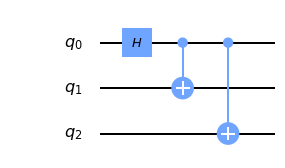

In [4]:
circ.draw('mpl')

In [5]:
from qiskit import Aer
backend = Aer.get_backend('statevector_simulator')

In [6]:
job = execute(circ,backend)
result = job.result()
outputstate = result.get_statevector(circ,decimals=3)
print(outputstate)

[0.707+0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.707+0.j]


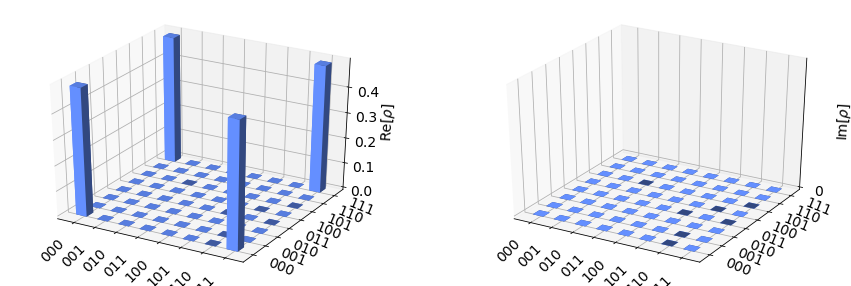

In [7]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

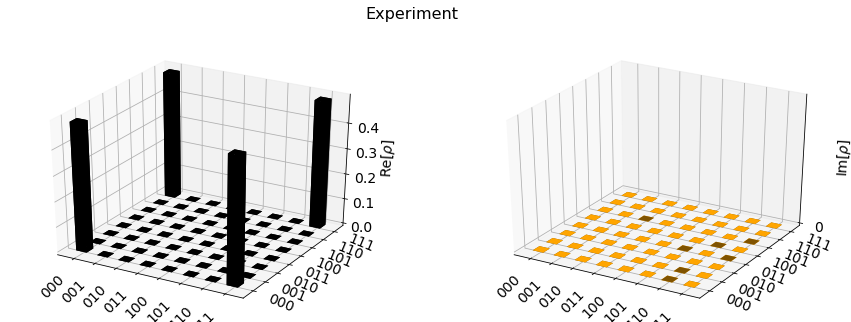

In [13]:
plot_state_city(outputstate,title = "Experiment",color=['black','orange'])

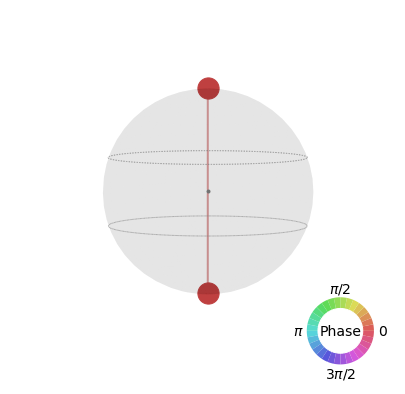

In [8]:
from qiskit.visualization import *
plot_state_qsphere(outputstate)

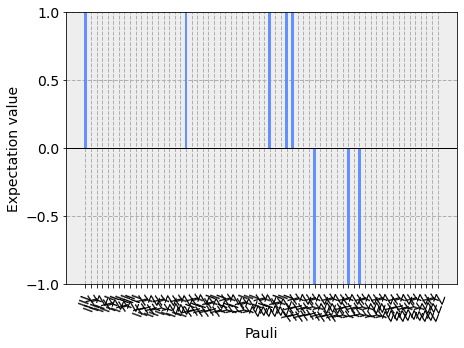

In [9]:
plot_state_paulivec(outputstate)

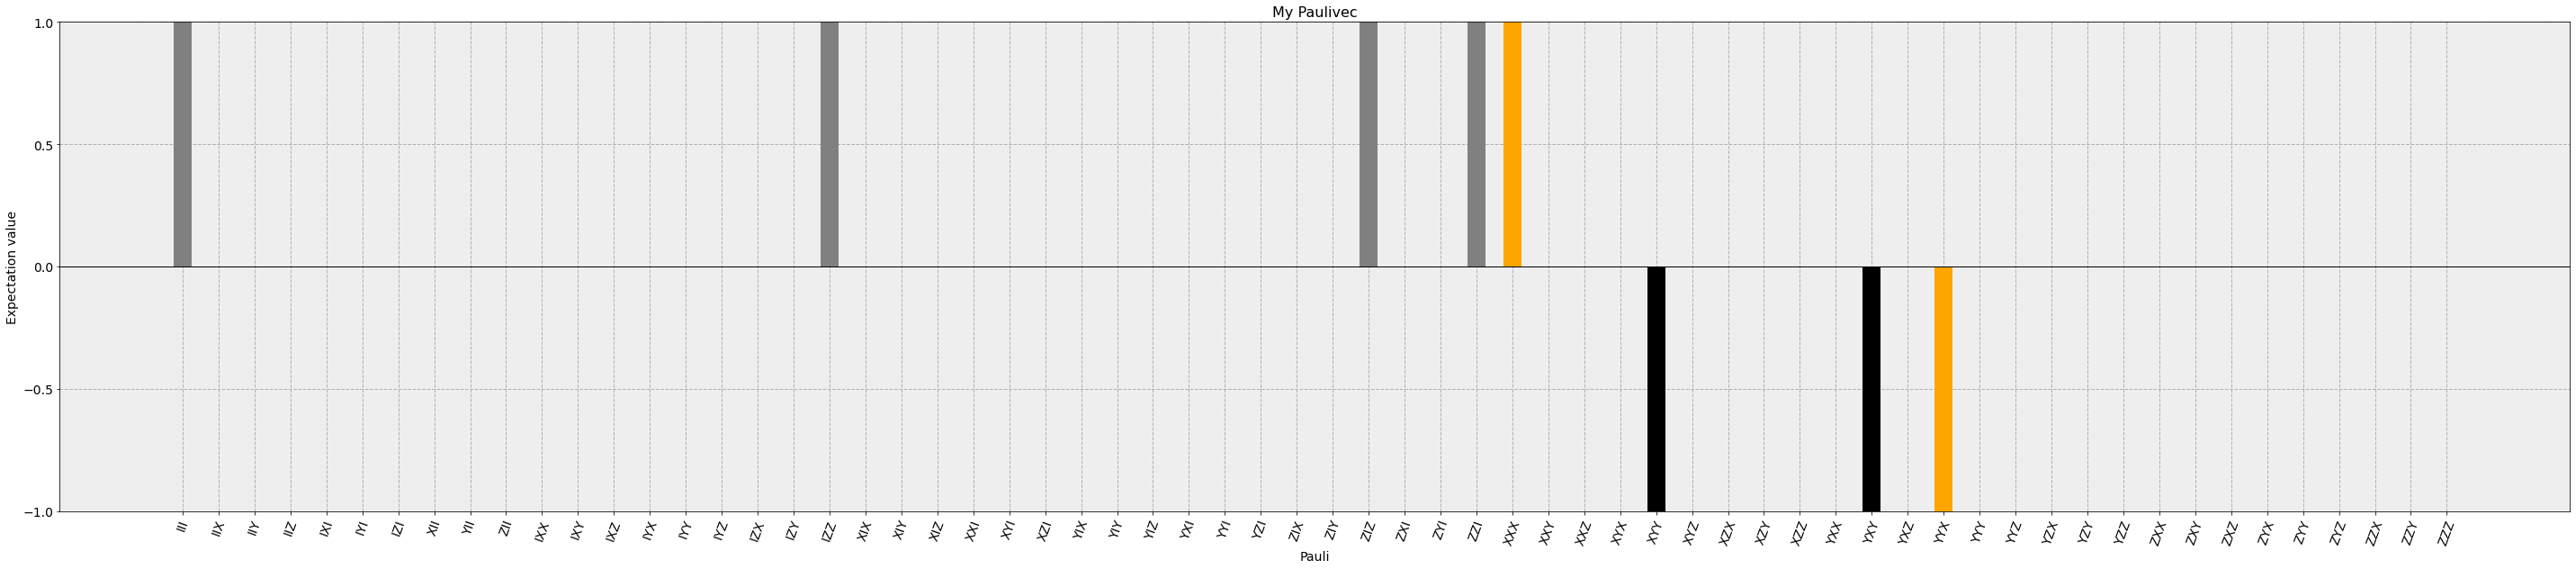

In [18]:
plot_state_paulivec(outputstate,title="My Paulivec",color=['grey','orange','black'],figsize=(50,10))

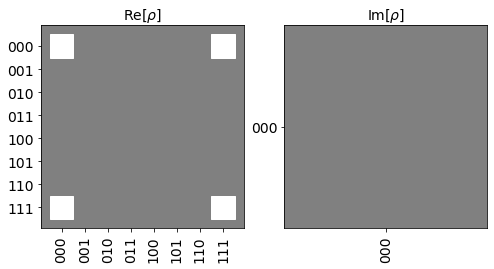

In [10]:
plot_state_hinton(outputstate)

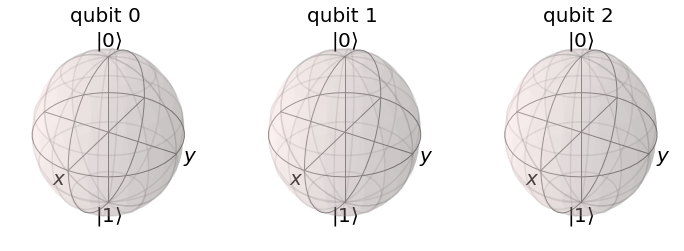

In [11]:
plot_bloch_multivector(outputstate)

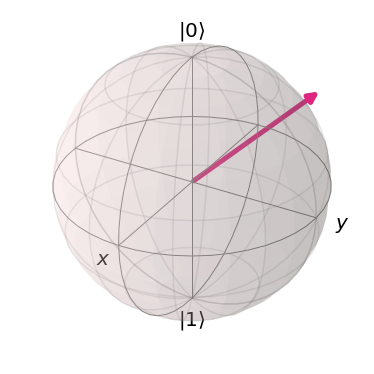

In [23]:
plot_bloch_vector([0,1,1])

In [24]:
backend2 = Aer.get_backend('unitary_simulator')
job = execute(circ,backend2)
result = job.result()
print(result.get_unitary(circ,decimals=3))

[[ 0.707+0.j  0.707-0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.707+0.j -0.707+0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j  0.707-0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.707+0.j  0.707-0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.707+0.j  0.707-0.j]
 [ 0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]]


In [25]:
meas = QuantumCircuit(3,3)
meas.barrier(range(3))
meas.measure(range(3),range(3))
qc = circ+meas
qc.draw()

┌───┐           ░ ┌─┐      
q_0: ┤ H ├──■────■───░─┤M├──────
     └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
q_1: ─────┤ X ├──┼───░──╫─┤M├───
          └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
q_2: ──────────┤ X ├─░──╫──╫─┤M├
               └───┘ ░  ║  ║ └╥┘
c_0: ═══════════════════╩══╬══╬═
                           ║  ║ 
c_1: ══════════════════════╩══╬═
                              ║ 
c_2: ═════════════════════════╩═

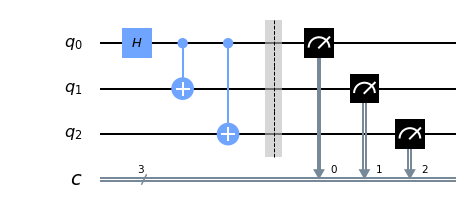

In [26]:
qc.draw('mpl')

In [30]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qc,backend_sim,shots=3024)#default shots is 1024
result_sim = job_sim.result()

In [31]:
counts = result_sim.get_counts(qc)
print(counts)

{'111': 1491, '000': 1533}


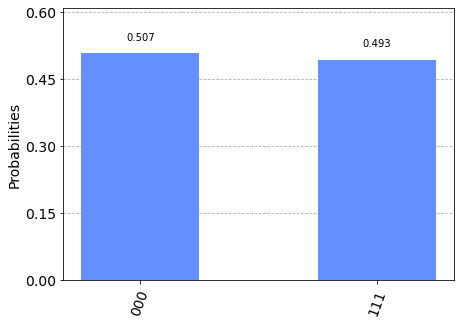

In [32]:
plot_histogram(counts)

<h1>Single qubit operations</h1>

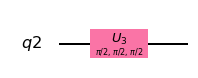

In [39]:
from math import pi
q = QuantumRegister(1)# any number of qubits can be input
sqc = QuantumCircuit(q)
sqc.u3(pi/2,pi/2,pi/2,q)#correspondingly that many times this unitary will be applied as many qubits are there
sqc.draw('mpl')

In [40]:
job = execute(sqc,backend2)
result = job.result().get_unitary(sqc,decimals=3)
print(result)

[[ 0.707+0.j    -0.   -0.707j]
 [ 0.   +0.707j -0.707+0.j   ]]


In [41]:
job = execute(sqc,backend)
result = job.result().get_statevector(sqc,decimals=3)
print(result)

[0.707+0.j    0.   +0.707j]


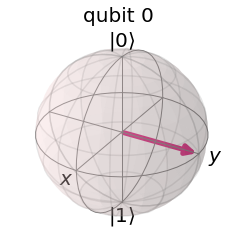

In [43]:
plot_bloch_multivector(result)